# Importação das Bibliotecas

In [1]:
import pandas as pd
import calendar
import datetime
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

In [2]:
pd.set_option("display.max_rows", None)

# Importação dos Dados

In [3]:
# Ler Arquivo csv

data_mailing = pd.read_csv(r'C:\Documents\Apresentacao\dados\data_apresentacao', low_memory=False)

In [ ]:
# Ler Excel
data_safra = pd.read_excel(r'C:\\Inadimplência\Refatoração Modelo de Inadimplência\Data\extratos\JAN20.xlsx', 
                                   sheet_name='Planilha1')


In [4]:
# ver o tamanho do dataframe

data_mailing.shape

(7793124, 13)

# Visualização Inicial dos Dados

In [5]:
# Ver os 5 primeiros dados registrados

data_mailing.head()

,Unnamed: 0,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,marcacao_ai,venda
0,0,20210401,30.00,6371.39,2020-08-07,S,"PREZAO R$29,99 POR MES 3GB+3GB",4GB ilimitado,39.99,"30,00 A 34,99",MPLAY NET,BP2,NaN
1,1,20210401,15.00,2.22,2020-06-10,S,"PREZAO R$14,99 2GB POR MES",3GB ilimitado,29.99,"15,00 A 19,99",MPLAY NET,BP,NaN
2,2,20210401,25.00,0.44,2020-03-16,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB+RENOVACAO",4GB ilimitado,39.99,"25,00 A 29,99",MPLAY NET,BP2,NaN
3,3,20210401,41.67,8016.61,2019-10-24,S,"PREZAO R$14,99 2GB POR MES",8GB ilimitado,41.99,"40,00 A 44,99",MPLAY NET,BP2,NaN
4,4,20210401,8.33,149.68,2020-09-11,S,"PREZAO R$1,99 POR DIA",3GB ilimitado,29.99,"05,00 A 09,99",MPLAY NET,MP,NaN


In [6]:
# Ver os 5 últimos dados registrados

data_mailing.tail()

,Unnamed: 0,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,marcacao_ai,venda
7793119,537340,20211203,30.00,6350.58,2020-03-25,S,"PREZAO R$1,99 POR DIA",4GB Ilimitado,"39,99","30,00 A 34,99",MAIOR 90 DIAS,MP,NaN
7793120,537341,20211203,45.00,649.64,2021-08-11,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB",6GB Ilimitado,"49,99","45,00 A 49,99",MAIOR 90 DIAS,MP,NaN
7793121,537342,20211203,30.00,13577.18,2020-05-09,S,"PREZAO R$1,99 POR DIA",4GB Ilimitado,"39,99","30,00 A 34,99",MAIOR 90 DIAS,MP,NaN
7793122,537343,20211203,16.67,237.81,2019-08-16,S,"PREZAO R$1,99 POR DIA",3GB Ilimitado,"29,99","15,00 A 19,99",MAIOR 90 DIAS,MP,NaN
7793123,537344,20211203,40.00,28442.56,2019-09-06,S,"PREZAO R$1,99 POR DIA",6GB Ilimitado,"49,99","40,00 A 44,99",MAIOR 90 DIAS,MP,NaN


In [7]:
# Ver os 5 dados aleatórios

data_mailing.sample(10)

,Unnamed: 0,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,marcacao_ai,venda
3649023,282380,20210801,26.67,322.91,2016-06-01,S,"PREZAO R$1,99 POR DIA",NaN,NaN,"25,00 A 29,99",MAIOR 90 DIAS,MP,NaN
1992859,241985,20210601,6.67,3.52,2020-08-29,S,"PREZAO R$19,99 POR MES 3GB+3GB",PrezÃ£o 6GB,"24,99","05,00 A 09,99",PREZAO 6GB ZB1,MP,NaN
5765275,403671,20211001,26.33,198.50,2019-05-30,S,"PREZAO R$1,99 POR DIA",4GB Ilimitado,"39,99","25,00 A 29,99",MAIOR 90 DIAS,AP,NaN
3212845,695687,20210701,20.00,4046.48,2019-12-02,S,"PREZAO R$1,49 POR DIA",PrezÃ£o 13GB,"29,99","20,00 A 24,99",OPORTUNIDADE Maior 89,MP,NaN
4857083,472122,20210901,18.00,1246.16,2021-06-15,S,"PREZAO R$1,99 POR DIA",NaN,NaN,"15,00 A 19,99",60a90 ZB1,MP,NaN
6181597,819993,20211001,13.33,3.99,NaN,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB",3GB Ilimitado,"29,99","10,00 A 14,99",MAIOR 90 DIAS,MP,NaN
1502247,887898,20210501,6.67,2.10,2019-07-17,S,"PREZAO R$19,99 POR MES 3GB+3GB",PrezÃ£o 6GB,"24,99","05,00 A 09,99",PREZAO 6GB ZB1,MP,NaN
4769184,384223,20210901,15.00,1326.19,NaN,S,PREZAO 14.99 POR MES,PrezÃ£o 6GB,"24,99","15,00 A 19,99",PREZAO 6GB,MP,1.0
1322516,708167,20210501,0.00,0.02,2016-02-03,S,"PREZAO R$1,49 POR DIA",PrezÃ£o 6GB,"24,99","00,00 A 04,99",PREZAO 6GB,MP,NaN
5157842,772881,20210901,26.67,5479.54,NaN,S,"PREZAO R$19,99 POR MES 3GB+3GB",4GB Ilimitado,"39,99","25,00 A 29,99",MAIOR 90 DIAS,MP,NaN


# Verificar a Integridade dos Dados

In [8]:
data_mailing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7793124 entries, 0 to 7793123
Data columns (total 13 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   cod_quinzena         int64  
 2   soma_recarga         float64
 3   soma_mb_trafegado    float64
 4   dat_ativacao         object 
 5   flag_utilizou_dados  object 
 6   plano_contratado     object 
 7   ds_campo_variavel_3  object 
 8   ds_campo_variavel_4  object 
 9   ds_campo_variavel_5  object 
 10  tipo_mailing         object 
 11  marcacao_ai          object 
 12  venda                float64
dtypes: float64(3), int64(2), object(8)
memory usage: 772.9+ MB


In [9]:
data_mailing.isnull().sum().sort_values(ascending=False).head(13)

venda                  7668199
ds_campo_variavel_3     802198
ds_campo_variavel_4     802198
dat_ativacao            460820
plano_contratado         18129
soma_recarga                 3
soma_mb_trafegado            3
marcacao_ai                  1
Unnamed: 0                   0
cod_quinzena                 0
flag_utilizou_dados          0
ds_campo_variavel_5          0
tipo_mailing                 0
dtype: int64

# Pré-Processamento

In [10]:
# Excluir colunas

data_mailing.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
data_mailing.head()

,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,marcacao_ai,venda
0,20210401,30.00,6371.39,2020-08-07,S,"PREZAO R$29,99 POR MES 3GB+3GB",4GB ilimitado,39.99,"30,00 A 34,99",MPLAY NET,BP2,NaN
1,20210401,15.00,2.22,2020-06-10,S,"PREZAO R$14,99 2GB POR MES",3GB ilimitado,29.99,"15,00 A 19,99",MPLAY NET,BP,NaN
2,20210401,25.00,0.44,2020-03-16,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB+RENOVACAO",4GB ilimitado,39.99,"25,00 A 29,99",MPLAY NET,BP2,NaN
3,20210401,41.67,8016.61,2019-10-24,S,"PREZAO R$14,99 2GB POR MES",8GB ilimitado,41.99,"40,00 A 44,99",MPLAY NET,BP2,NaN
4,20210401,8.33,149.68,2020-09-11,S,"PREZAO R$1,99 POR DIA",3GB ilimitado,29.99,"05,00 A 09,99",MPLAY NET,MP,NaN


In [26]:
data_mailing['ds_campo_variavel_4'] = data_mailing['ds_campo_variavel_4'].astype('float')

ValueError: could not convert string to float: '29,99'

In [12]:
# ver a quantidade de cada valor da variavel ds_campo_variavel_4

data_mailing['ds_campo_variavel_4'].value_counts(dropna=False)

29,99    3500368
24,99    1695207
NaN       802198
39,99     630254
49,99     323099
29.99     322808
34,99     243701
64,99      86906
44,99      76588
39.99      41308
54,99      38789
41.99      18353
34.99       9126
55.99       4419
Name: ds_campo_variavel_4, dtype: int64

In [13]:
# trocar , por . na ds_campo_variavel_4

data_mailing['ds_campo_variavel_4'].replace(',' , '.', regex=True, inplace=True)

In [14]:
# transformar a variavel ds_campo_variavel_4 de string para float

data_mailing['ds_campo_variavel_4'] = data_mailing['ds_campo_variavel_4'].astype('float')

In [15]:
# ver a quantidade de cada valor da variavel ds_campo_variavel_4

data_mailing['ds_campo_variavel_4'].value_counts(dropna=False)

29.99    3823176
24.99    1695207
NaN       802198
39.99     671562
49.99     323099
34.99     252827
64.99      86906
44.99      76588
54.99      38789
41.99      18353
55.99       4419
Name: ds_campo_variavel_4, dtype: int64

In [16]:
# ver a porcentagem de cada valor da variavel ds_campo_variavel_4

data_mailing['ds_campo_variavel_4'].value_counts('dsdd', dropna=False)*100

29.99    49.058324
24.99    21.752599
NaN      10.293664
39.99     8.617366
49.99     4.145950
34.99     3.244232
64.99     1.115163
44.99     0.982764
54.99     0.497734
41.99     0.235502
55.99     0.056704
Name: ds_campo_variavel_4, dtype: float64

## Substituir os valores nulos de colunas numéricas

### Para coluna soma_mb_trafegado, vamos substituir os valores nulos pela média ou mediana?

In [17]:
data_mailing['soma_mb_trafegado'].median()

166.16

In [18]:
# Substituir os valores pela média

data_mailing['soma_mb_trafegado'].fillna(data_mailing['soma_mb_trafegado'].mean(), inplace=True)

In [19]:
# Substituir os valores pela mediana

data_mailing['soma_mb_trafegado'].fillna(data_mailing['soma_mb_trafegado'].median(), inplace=True)

### Preencher coluna Venda

In [20]:
# Substituir os valores por 0

data_mailing['venda'].fillna(0, inplace=True)

### Excluir os Valores nulos

In [21]:
# Excluir os Valores nulos

data_mailing.dropna(subset=['soma_recarga'], inplace=True)

## Substituir os valores nulos de colunas categóricas

In [22]:
data_mailing['ds_campo_variavel_3'].value_counts('mean', dropna=False)*100

3GB Ilimitado     41.753015
PrezÃ£o 6GB       21.752607
NaN               10.293655
4GB Ilimitado      8.087312
3GB ilimitado      4.142217
PrezÃ£o 13GB       3.163084
6GB Ilimitado      3.159504
PrezÃ£o 4GB        3.127130
8GB Ilimitado      2.466945
10GB Ilimitado     1.115163
4GB ilimitado      0.530057
8GB ilimitado      0.235503
6GB ilimitado      0.117103
10GB ilimitado     0.056704
Name: ds_campo_variavel_3, dtype: float64

In [84]:
# Substituir os valores pela média

data_mailing['ds_campo_variavel_3'].fillna(data_mailing['ds_campo_variavel_3'].mode(), inplace=True)

# Outliers !

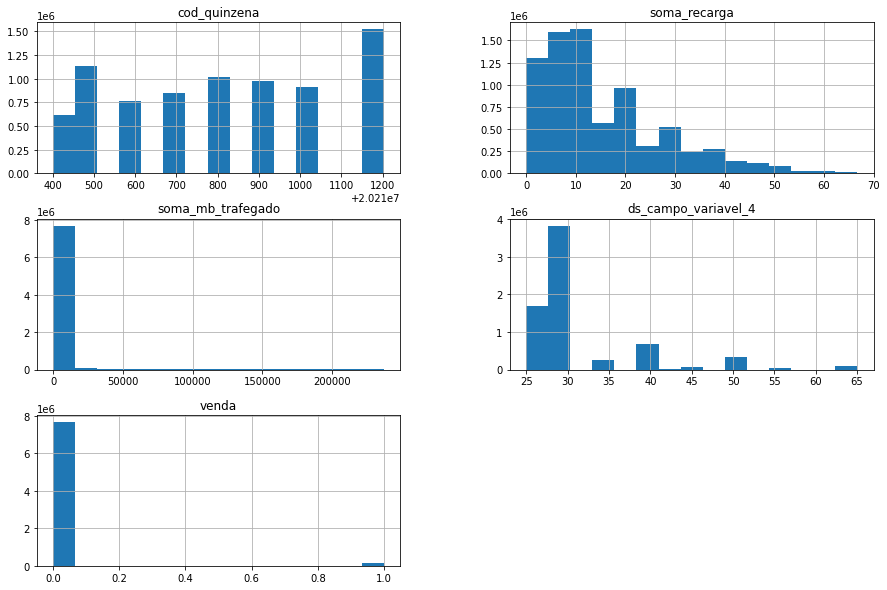

In [23]:
# plotar histograma

data_mailing.hist(bins=15, figsize=(15,10));

In [24]:
data_mailing.describe()

,cod_quinzena,soma_recarga,soma_mb_trafegado,ds_campo_variavel_4,venda
count,7.793121e+06,7.793121e+06,7.793121e+06,6.990924e+06,7.793121e+06
mean,2.021081e+07,1.557442e+01,1.750219e+03,3.162942e+01,1.603016e-02
std,2.606605e+02,1.227516e+01,3.705810e+03,7.371428e+00,1.255914e-01
min,2.021040e+07,0.000000e+00,0.000000e+00,2.499000e+01,0.000000e+00
25%,2.021060e+07,6.670000e+00,1.000000e-02,2.999000e+01,0.000000e+00
50%,2.021080e+07,1.333000e+01,1.661600e+02,2.999000e+01,0.000000e+00
75%,2.021100e+07,2.000000e+01,1.672430e+03,2.999000e+01,0.000000e+00
max,2.021120e+07,6.667000e+01,2.371333e+05,6.499000e+01,1.000000e+00


In [25]:
data_mailing['soma_mb_trafegado'].mean()

1750.2187817653537

In [26]:
data_mailing['soma_mb_trafegado'].median()

166.16

## soma_recarga

In [27]:
# Verificar o limite inferior e superior

q1_linha = data_mailing.soma_recarga.quantile(.25)
q3_linha = data_mailing.soma_recarga.quantile(.75)
Iqr_linha = q3_linha - q1_linha
sup_linha = q3_linha + 1.5*Iqr_linha
inf_linha = q1_linha - 1.5*Iqr_linha

print("Iqr da variável soma_recarga: ", Iqr_linha)
print("Limite Superior de atributo: ", sup_linha)
print("Limite Inferior de atributo: ", inf_linha)

Iqr da variável soma_recarga:  13.33
Limite Superior de atributo:  39.995000000000005
Limite Inferior de atributo:  -13.325000000000001


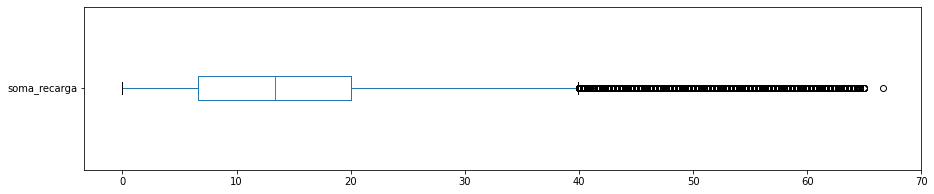

soma_recarga: valores acima de 39.9:
Entradas: 538176
Porcentagem: 6.9058%


In [28]:
# boxplot

data_mailing.soma_recarga.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores 
print("soma_recarga: valores acima de 39.9:")
print("Entradas: {}".format(len(data_mailing[data_mailing.soma_recarga>39.9])))
print("Porcentagem: {:.4f}%".format((len(data_mailing[data_mailing.soma_recarga>39.9]) / data_mailing.shape[0])*100))

## soma_mb_trafegado

In [29]:
# Verificar o limite inferior e superior 

q1_soma = data_mailing.soma_mb_trafegado.quantile(.25)
q3_soma = data_mailing.soma_mb_trafegado.quantile(.75)
Iqr_soma = q3_soma - q1_soma
sup_soma = q3_soma + 1.5*Iqr_soma
inf_soma = q1_soma - 1.5*Iqr_soma

print("Iqr da variável soma_mb_trafegado: ", Iqr_soma)
print("Limite Superior de atributo: ", sup_soma)
print("Limite Inferior de atributo: ", inf_soma)

Iqr da variável soma_mb_trafegado:  1672.42
Limite Superior de atributo:  4181.06
Limite Inferior de atributo:  -2508.62


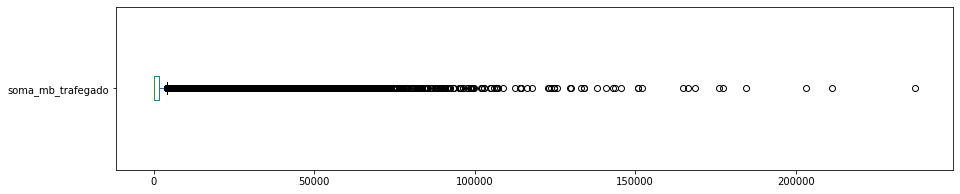

soma_mb_trafegado: valores acima de 4181.06:
Entradas: 1072320
Porcentagem: 13.7598%


In [30]:
# boxplot

data_mailing.soma_mb_trafegado.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Ver quantidade de valores 
print("soma_mb_trafegado: valores acima de 4181.06:")
print("Entradas: {}".format(len(data_mailing[data_mailing.soma_mb_trafegado>4181.06])))
print("Porcentagem: {:.4f}%".format((len(data_mailing[data_mailing.soma_mb_trafegado>4181.06]) / data_mailing.shape[0])*100))

In [31]:
data_mailing.soma_mb_trafegado.median()

166.16

In [32]:
data_mailing.soma_mb_trafegado.mean()

1750.2187817653537

In [46]:
data_mailing.drop(columns=['marcacao_ai'], inplace=True)

# Análise Conversão

In [47]:
data_mailing.head()

,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,venda
0,20210401,30.00,6371.39,2020-08-07,S,"PREZAO R$29,99 POR MES 3GB+3GB",4GB ilimitado,39.99,"30,00 A 34,99",MPLAY NET,0.0
1,20210401,15.00,2.22,2020-06-10,S,"PREZAO R$14,99 2GB POR MES",3GB ilimitado,29.99,"15,00 A 19,99",MPLAY NET,0.0
2,20210401,25.00,0.44,2020-03-16,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB+RENOVACAO",4GB ilimitado,39.99,"25,00 A 29,99",MPLAY NET,0.0
3,20210401,41.67,8016.61,2019-10-24,S,"PREZAO R$14,99 2GB POR MES",8GB ilimitado,41.99,"40,00 A 44,99",MPLAY NET,0.0
4,20210401,8.33,149.68,2020-09-11,S,"PREZAO R$1,99 POR DIA",3GB ilimitado,29.99,"05,00 A 09,99",MPLAY NET,0.0


In [51]:
pd.set_option("display.max_rows", None)

In [67]:
data = data_mailing.groupby(['cod_quinzena', 'flag_utilizou_dados']).agg({'flag_utilizou_dados' : 'count', 'venda' : 'mean'})
data['venda'] = round(data['venda']*100, 2)
data.rename(columns={'flag_utilizou_dados' : 'Quantidade', 'venda' : 'Conversão'}, inplace=True)
data.sort_values(by=['cod_quinzena', 'Conversão'], ascending=False)

Quantidade  Conversão
cod_quinzena flag_utilizou_dados                       
20211203     S                        458977       0.87
             N                         78368       0.43
20211201     S                        859190       1.53
             N                        124809       0.63
20211001     S                        792814       1.19
             N                        117362       0.49
20210901     S                        848494       2.24
             N                        128149       0.95
20210801     S                        874151       2.62
             N                        144167       1.02
20210701     S                        716181       1.84
             N                        133304       0.78
20210601     S                        643248       1.23
             N                        123033       0.56
20210502     S                        209224       1.16
             N                         38021       0.53
20210501     S                        727085       2.37
             N                        162195       0.99
20210401     S                        509079       1.39
             N                        105269       0.68

## Feature Engineering

In [34]:
data_mailing.describe()

,cod_quinzena,soma_recarga,soma_mb_trafegado,ds_campo_variavel_4,venda
count,7.793121e+06,7.793121e+06,7.793121e+06,6.990924e+06,7.793121e+06
mean,2.021081e+07,1.557442e+01,1.750219e+03,3.162942e+01,1.603016e-02
std,2.606605e+02,1.227516e+01,3.705810e+03,7.371428e+00,1.255914e-01
min,2.021040e+07,0.000000e+00,0.000000e+00,2.499000e+01,0.000000e+00
25%,2.021060e+07,6.670000e+00,1.000000e-02,2.999000e+01,0.000000e+00
50%,2.021080e+07,1.333000e+01,1.661600e+02,2.999000e+01,0.000000e+00
75%,2.021100e+07,2.000000e+01,1.672430e+03,2.999000e+01,0.000000e+00
max,2.021120e+07,6.667000e+01,2.371333e+05,6.499000e+01,1.000000e+00


In [68]:
data_mailing['coluna'] = 0

In [69]:
data_mailing.head()

,cod_quinzena,soma_recarga,soma_mb_trafegado,dat_ativacao,flag_utilizou_dados,plano_contratado,ds_campo_variavel_3,ds_campo_variavel_4,ds_campo_variavel_5,tipo_mailing,venda,coluna
0,20210401,30.00,6371.39,2020-08-07,S,"PREZAO R$29,99 POR MES 3GB+3GB",4GB ilimitado,39.99,"30,00 A 34,99",MPLAY NET,0.0,0
1,20210401,15.00,2.22,2020-06-10,S,"PREZAO R$14,99 2GB POR MES",3GB ilimitado,29.99,"15,00 A 19,99",MPLAY NET,0.0,0
2,20210401,25.00,0.44,2020-03-16,S,"PREZAO R$9,99 POR SEMANA 1GB+1GB+RENOVACAO",4GB ilimitado,39.99,"25,00 A 29,99",MPLAY NET,0.0,0
3,20210401,41.67,8016.61,2019-10-24,S,"PREZAO R$14,99 2GB POR MES",8GB ilimitado,41.99,"40,00 A 44,99",MPLAY NET,0.0,0
4,20210401,8.33,149.68,2020-09-11,S,"PREZAO R$1,99 POR DIA",3GB ilimitado,29.99,"05,00 A 09,99",MPLAY NET,0.0,0


In [72]:
def interval_mb_trafegados(row):
    if row <= 0.01:
        return 'Internet --'
    elif 0.01 < row <= 166:
        return 'Internet -'
    elif 166 < row <= 1672:
        return 'Internet +'
    elif row > 1672:
        return 'Internet ++'
    
data_mailing['faixa_soma_mb_trafegado'] = data_mailing['soma_mb_trafegado'].apply(interval_mb_trafegados)

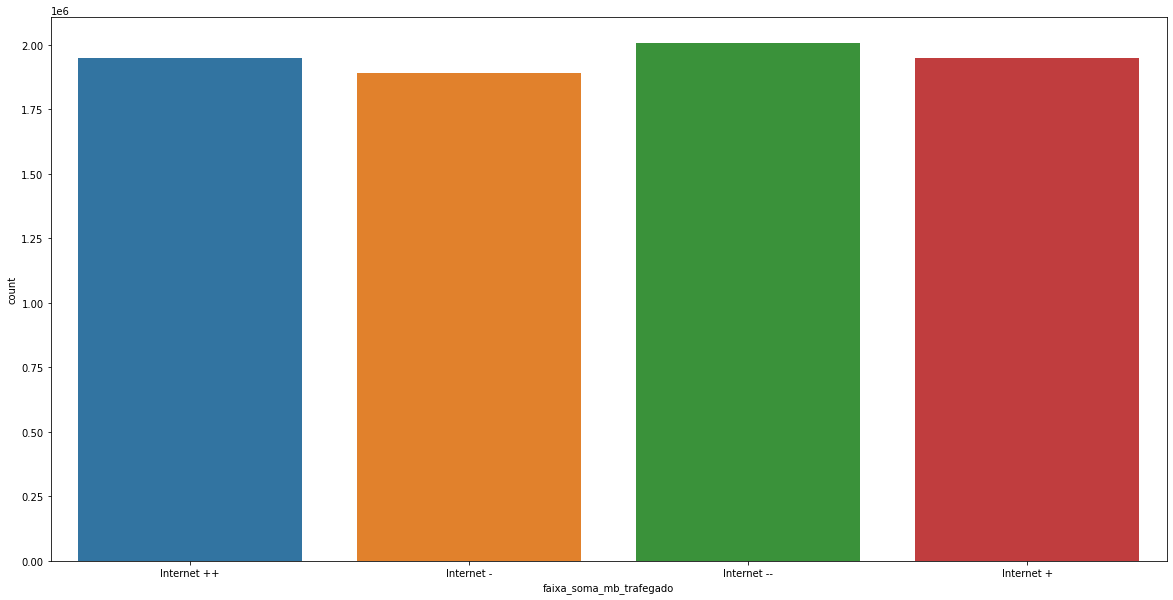

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

ax, fig = plt.subplots(figsize=(20,10))
sns.countplot(x='faixa_soma_mb_trafegado', data=data_mailing);

In [77]:
data = data_mailing.groupby(['cod_quinzena', 'faixa_soma_mb_trafegado', 'ds_campo_variavel_5']).agg({'flag_utilizou_dados' : 'count', 'venda' : 'mean'})
data['venda'] = round(data['venda']*100, 2)

data.rename(columns={'flag_utilizou_dados' : 'Quantidade', 'venda' : 'Conversão'}, inplace=True)
data.sort_values(by=['cod_quinzena','Conversão'], ascending=False)

Quantidade  \
cod_quinzena faixa_soma_mb_trafegado ds_campo_variavel_5               
20211203     Internet ++             00,00 A 04,99              1578   
                                     25,00 A 29,99             13949   
             Internet -              35,00 A 39,99               776   
             Internet ++             15,00 A 19,99              9737   
                                     05,00 A 09,99              4451   
                                     10,00 A 14,99             14220   
             Internet --             60,00 A 64,99               229   
             Internet +              15,00 A 19,99             15825   
             Internet -              45,00 A 49,99               346   
             Internet ++             20,00 A 24,99             37218   
             Internet -              25,00 A 29,99              2803   
             Internet +              25,00 A 29,99              9360   
                                     10,00 A 14,99             30034   
             Internet -              15,00 A 19,99              8083   
                                     55,00 A 59,99               104   
             Internet +              05,00 A 09,99             18981   
             Internet ++             50,00 A 54,99              7435   
             Internet +              50,00 A 54,99              1794   
             Internet -              50,00 A 54,99               337   
             Internet +              20,00 A 24,99             25631   
             Internet --             45,00 A 49,99               570   
             Internet -              10,00 A 14,99             25552   
                                     00,00 A 04,99             33463   
             Internet +              55,00 A 59,99               703   
             Internet -              20,00 A 24,99              9059   
                                     30,00 A 34,99              2665   
             Internet +              00,00 A 04,99              6573   
                                     35,00 A 39,99              4204   
             Internet --             35,00 A 39,99              1031   
             Internet -              05,00 A 09,99             30533   
             Internet ++             35,00 A 39,99              9305   
             Internet --             50,00 A 54,99               543   
             Internet +              60,00 A 64,99               692   
             Internet --             15,00 A 19,99              7220   
             Internet ++             60,00 A 64,99              3798   
                                     55,00 A 59,99              3366   
             Internet --             05,00 A 09,99             29149   
                                     25,00 A 29,99              3511   
             Internet +              45,00 A 49,99              2004   
             Internet ++             45,00 A 49,99              7802   
             Internet --             10,00 A 14,99             24831   
             Internet +              30,00 A 34,99             10574   
             Internet ++             30,00 A 34,99             27342   
             Internet --             20,00 A 24,99             11452   
             Internet +              40,00 A 44,99              4750   
             Internet ++             40,00 A 44,99             16933   
             Internet --             00,00 A 04,99             50962   
                                     30,00 A 34,99              3252   
                                     40,00 A 44,99              1406   
             Internet -              40,00 A 44,99               903   
                                     60,00 A 64,99               121   
             Internet --             55,00 A 59,99               185   
20211201     Internet ++             00,00 A 04,99              8975   
                                     10,00 A 14,99             37847   
                          